In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [ ]:
df = pd.read_csv("train.csv")

In [ ]:
df.shape

(8341, 21)

In [ ]:
df.head()

,Unnamed: 0,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,...,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,7957,North East,Assam,Rural,Guwhati,Personal,Household,AC,0,1,...,0,0,0,4474.0,12,202,Manufacturer,30.0,Claim,0
1,1396,East,Delhi,Urban,New Delhi,Personal,Entertainment,TV,0,0,...,1,1,1,25000.0,13,60,Dealer,1.3,Complaint,0
2,7582,West,Andhra Pradesh,Rural,Hyderabad,Business,Household,AC,0,0,...,0,0,0,10000.0,12,3,Dealer,2.5,Claim,0
3,5824,West,Gujarat,Rural,Ahmedabad,Personal,Entertainment,TV,0,0,...,1,1,0,4216.0,10,672,Dealer,25.0,Other,0
4,4086,South West,Kerala,Rural,Kochi,Business,Household,AC,0,0,...,0,0,0,20000.0,13,3,Manufacturer,6.5,Claim,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8341 entries, 0 to 8340
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        8341 non-null   int64  
 1   Region            8341 non-null   object 
 2   State             8341 non-null   object 
 3   Area              8341 non-null   object 
 4   City              8341 non-null   object 
 5   Consumer_profile  8341 non-null   object 
 6   Product_category  8341 non-null   object 
 7   Product_type      8341 non-null   object 
 8   AC_1001_Issue     8341 non-null   int64  
 9   AC_1002_Issue     8341 non-null   int64  
 10  AC_1003_Issue     8341 non-null   int64  
 11  TV_2001_Issue     8341 non-null   int64  
 12  TV_2002_Issue     8341 non-null   int64  
 13  TV_2003_Issue     8341 non-null   int64  
 14  Claim_Value       8101 non-null   float64
 15  Service_Centre    8341 non-null   int64  
 16  Product_Age       8341 non-null   int64  


In [ ]:
df_cat = pd.DataFrame.copy(df)
columns = ['Product_Age','Call_details','Claim_Value']
for i in df_cat.columns:
    if i not in columns:
        df_cat[i] = df_cat[i].astype('category')
[f"{i} is {df_cat[i].dtype}" for i in df_cat.columns]

['Unnamed: 0 is category',
 'Region is category',
 'State is category',
 'Area is category',
 'City is category',
 'Consumer_profile is category',
 'Product_category is category',
 'Product_type is category',
 'AC_1001_Issue is category',
 'AC_1002_Issue is category',
 'AC_1003_Issue is category',
 'TV_2001_Issue is category',
 'TV_2002_Issue is category',
 'TV_2003_Issue is category',
 'Claim_Value is float64',
 'Service_Centre is category',
 'Product_Age is int64',
 'Purchased_from is category',
 'Call_details is float64',
 'Purpose is category',
 'Fraud is category']

In [ ]:
df.corr()

<ipython-input-7-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Call_details,Fraud
Unnamed: 0,1.000000,0.006909,0.003417,0.000367,0.008109,-0.001804,0.006064,-0.008793,-0.005415,0.000556,0.013164,0.011707
AC_1001_Issue,0.006909,1.000000,0.456137,0.276664,-0.283081,-0.317619,-0.254549,-0.175322,0.108771,0.029823,0.055673,-0.047167
AC_1002_Issue,0.003417,0.456137,1.000000,0.510574,-0.308733,-0.346401,-0.277615,-0.171596,0.141690,0.122035,0.167593,-0.104843
AC_1003_Issue,0.000367,0.276664,0.510574,1.000000,-0.228961,-0.256895,-0.205883,-0.061588,0.054166,0.123426,0.109077,-0.044674
TV_2001_Issue,0.008109,-0.283081,-0.308733,-0.228961,1.000000,0.538470,0.404855,-0.157812,-0.035858,0.152686,0.130165,-0.006736
TV_2002_Issue,-0.001804,-0.317619,-0.346401,-0.256895,0.538470,1.000000,0.386154,-0.126759,-0.063626,0.217248,0.253741,0.067454
TV_2003_Issue,0.006064,-0.254549,-0.277615,-0.205883,0.404855,0.386154,1.000000,0.103967,-0.011485,-0.026575,-0.054024,0.077487
Claim_Value,-0.008793,-0.175322,-0.171596,-0.061588,-0.157812,-0.126759,0.103967,1.000000,-0.015488,-0.441909,-0.537507,0.141641
Service_Centre,-0.005415,0.108771,0.141690,0.054166,-0.035858,-0.063626,-0.011485,-0.015488,1.000000,-0.154499,-0.142463,0.003279
Product_Age,0.000556,0.029823,0.122035,0.123426,0.152686,0.217248,-0.026575,-0.441909,-0.154499,1.000000,0.686008,-0.097375


In [ ]:
df['Claim_Value']

0        4474.0
1       25000.0
2       10000.0
3        4216.0
4       20000.0
         ...   
8336    10000.0
8337    50000.0
8338     2000.0
8339     6000.0
8340    10000.0
Name: Claim_Value, Length: 8341, dtype: float64

In [ ]:
df = df.drop('Unnamed: 0', axis = 1)

In [ ]:
df.corr()

<ipython-input-10-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Call_details,Fraud
AC_1001_Issue,1.000000,0.456137,0.276664,-0.283081,-0.317619,-0.254549,-0.175322,0.108771,0.029823,0.055673,-0.047167
AC_1002_Issue,0.456137,1.000000,0.510574,-0.308733,-0.346401,-0.277615,-0.171596,0.141690,0.122035,0.167593,-0.104843
AC_1003_Issue,0.276664,0.510574,1.000000,-0.228961,-0.256895,-0.205883,-0.061588,0.054166,0.123426,0.109077,-0.044674
TV_2001_Issue,-0.283081,-0.308733,-0.228961,1.000000,0.538470,0.404855,-0.157812,-0.035858,0.152686,0.130165,-0.006736
TV_2002_Issue,-0.317619,-0.346401,-0.256895,0.538470,1.000000,0.386154,-0.126759,-0.063626,0.217248,0.253741,0.067454
TV_2003_Issue,-0.254549,-0.277615,-0.205883,0.404855,0.386154,1.000000,0.103967,-0.011485,-0.026575,-0.054024,0.077487
Claim_Value,-0.175322,-0.171596,-0.061588,-0.157812,-0.126759,0.103967,1.000000,-0.015488,-0.441909,-0.537507,0.141641
Service_Centre,0.108771,0.141690,0.054166,-0.035858,-0.063626,-0.011485,-0.015488,1.000000,-0.154499,-0.142463,0.003279
Product_Age,0.029823,0.122035,0.123426,0.152686,0.217248,-0.026575,-0.441909,-0.154499,1.000000,0.686008,-0.097375
Call_details,0.055673,0.167593,0.109077,0.130165,0.253741,-0.054024,-0.537507,-0.142463,0.686008,1.000000,-0.046372


In [ ]:
df1 = df[['AC_1001_Issue','AC_1002_Issue','AC_1003_Issue','TV_2001_Issue','TV_2002_Issue','TV_2003_Issue','Service_Centre','Product_Age','Call_details','Fraud']]

In [ ]:
df1

,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Service_Centre,Product_Age,Call_details,Fraud
0,0,1,2,0,0,0,12,202,30.0,0
1,0,0,0,1,1,1,13,60,1.3,0
2,0,0,0,0,0,0,12,3,2.5,0
3,0,0,0,1,1,0,10,672,25.0,0
4,0,0,0,0,0,0,13,3,6.5,0
...,...,...,...,...,...,...,...,...,...,...
8336,0,1,1,0,0,0,14,15,2.6,0
8337,0,0,0,0,0,0,13,4,1.3,0
8338,0,1,0,0,0,0,12,61,24.0,0
8339,1,1,1,0,0,0,15,280,21.0,0


In [ ]:
df1['Fraud'].unique()

array([0, 1])

In [ ]:
f = {}
for i in range(len(df1)):
  curr = df1['Fraud'][i]
  if curr not in f:
    f[curr] = 1
  else:
    f[curr] +=1

In [ ]:
f

{0: 7675, 1: 666}

In [ ]:
X = df1.iloc[:,:-1]
y = df1['Fraud'].array
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [ ]:
X

,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Service_Centre,Product_Age,Call_details
0,0,1,2,0,0,0,12,202,30.0
1,0,0,0,1,1,1,13,60,1.3
2,0,0,0,0,0,0,12,3,2.5
3,0,0,0,1,1,0,10,672,25.0
4,0,0,0,0,0,0,13,3,6.5
...,...,...,...,...,...,...,...,...,...
15345,0,0,0,0,0,0,13,16,2.5
15346,0,0,0,1,1,1,10,60,0.5
15347,0,0,0,0,0,2,13,18,0.5
15348,0,0,0,0,0,2,13,18,0.5


In [ ]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
not_fraud = df1.groupby('Fraud').get_group(0)
fraud = df1.groupby('Fraud').get_group(1)

In [ ]:
fraud.corr()

,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Service_Centre,Product_Age,Call_details,Fraud
AC_1001_Issue,1.000000,0.350560,0.158913,-0.279414,-0.324866,-0.285612,-0.091376,0.160437,0.298382,NaN
AC_1002_Issue,0.350560,1.000000,0.506650,-0.196762,-0.228769,-0.201127,0.157722,0.093464,-0.149353,NaN
AC_1003_Issue,0.158913,0.506650,1.000000,-0.204023,-0.237211,-0.208549,-0.030279,0.231337,-0.131208,NaN
TV_2001_Issue,-0.279414,-0.196762,-0.204023,1.000000,0.720098,0.364021,0.094548,-0.072631,-0.001277,NaN
TV_2002_Issue,-0.324866,-0.228769,-0.237211,0.720098,1.000000,0.131367,0.047949,0.046037,0.237792,NaN
TV_2003_Issue,-0.285612,-0.201127,-0.208549,0.364021,0.131367,1.000000,0.159978,-0.177921,-0.251306,NaN
Service_Centre,-0.091376,0.157722,-0.030279,0.094548,0.047949,0.159978,1.000000,0.183003,0.072174,NaN
Product_Age,0.160437,0.093464,0.231337,-0.072631,0.046037,-0.177921,0.183003,1.000000,0.603944,NaN
Call_details,0.298382,-0.149353,-0.131208,-0.001277,0.237792,-0.251306,0.072174,0.603944,1.000000,NaN
Fraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
not_fraud.corr()

,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Service_Centre,Product_Age,Call_details,Fraud
AC_1001_Issue,1.000000,0.458613,0.280771,-0.284060,-0.316984,-0.251251,0.121551,0.019882,0.038635,NaN
AC_1002_Issue,0.458613,1.000000,0.510343,-0.316813,-0.353532,-0.280221,0.143229,0.113600,0.178742,NaN
AC_1003_Issue,0.280771,0.510343,1.000000,-0.230961,-0.257731,-0.204285,0.059708,0.115237,0.122227,NaN
TV_2001_Issue,-0.284060,-0.316813,-0.230961,1.000000,0.527197,0.412064,-0.044889,0.163403,0.139178,NaN
TV_2002_Issue,-0.316984,-0.353532,-0.257731,0.527197,1.000000,0.412613,-0.074805,0.239317,0.260068,NaN
TV_2003_Issue,-0.251251,-0.280221,-0.204285,0.412064,0.412613,1.000000,-0.028445,-0.009186,-0.031246,NaN
Service_Centre,0.121551,0.143229,0.059708,-0.044889,-0.074805,-0.028445,1.000000,-0.173214,-0.159371,NaN
Product_Age,0.019882,0.113600,0.115237,0.163403,0.239317,-0.009186,-0.173214,1.000000,0.692665,NaN
Call_details,0.038635,0.178742,0.122227,0.139178,0.260068,-0.031246,-0.159371,0.692665,1.000000,NaN
Fraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
fraud.describe()

,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Service_Centre,Product_Age,Call_details,Fraud
count,666.000000,666.000000,666.000000,666.000000,666.000000,666.00000,666.000000,666.000000,666.000000,666.0
mean,0.177177,0.091592,0.114114,0.340841,0.579580,0.43994,12.851351,90.021021,8.881532,1.0
std,0.433716,0.318391,0.382566,0.499065,0.729901,0.63019,1.649007,153.404099,11.108310,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,10.000000,4.000000,0.500000,1.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,12.000000,12.000000,1.500000,1.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,13.000000,18.000000,2.400000,1.0
75%,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,14.000000,60.000000,20.000000,1.0
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,15.000000,873.000000,30.000000,1.0


In [ ]:
not_fraud.describe()

,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Service_Centre,Product_Age,Call_details,Fraud
count,7675.000000,7675.000000,7675.000000,7675.000000,7675.000000,7675.000000,7675.000000,7675.000000,7675.000000,7675.0
mean,0.276873,0.318697,0.196612,0.355440,0.420326,0.283779,12.830489,175.413290,10.867661,0.0
std,0.582814,0.601500,0.509016,0.594515,0.630023,0.536634,1.731316,242.466663,11.639916,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,3.000000,0.500000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,10.000000,1.500000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,22.000000,3.000000,0.0
75%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,14.000000,288.000000,23.000000,0.0
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,16.000000,991.000000,30.000000,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=39, stratify = y)

In [ ]:
X.head()


,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Service_Centre,Product_Age,Call_details
0,0,1,2,0,0,0,12,202,30.0
1,0,0,0,1,1,1,13,60,1.3
2,0,0,0,0,0,0,12,3,2.5
3,0,0,0,1,1,0,10,672,25.0
4,0,0,0,0,0,0,13,3,6.5


In [ ]:
X.isnull().sum()

AC_1001_Issue     0
AC_1002_Issue     0
AC_1003_Issue     0
TV_2001_Issue     0
TV_2002_Issue     0
TV_2003_Issue     0
Service_Centre    0
Product_Age       0
Call_details      0
dtype: int64

In [ ]:
gnb = GaussianNB()
tree = DecisionTreeClassifier(random_state=39)
knn = KNeighborsClassifier(n_neighbors=3)
svm = LinearSVC(random_state=39, dual = False)
log = LogisticRegression(solver='lbfgs', max_iter=10000, random_state = 39)
rf = RandomForestClassifier(max_depth=2, random_state=39)
cv = StratifiedKFold(n_splits=10, random_state=39, shuffle=True)
models = [gnb, tree, knn, log, rf, svm]

In [ ]:
gnb.fit(X_train,y_train)
tree.fit(X_train,y_train)
knn.fit(X_train,y_train)
svm.fit(X_train,y_train)
log.fit(X_train,y_train)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, random_state=39)

In [ ]:
y_pred_gnb = gnb.predict(X_test)
y_pred_tree = tree.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_log = log.predict(X_test)
y_pred_rf = rf.predict(X_test)

In [ ]:
def cf(model):
    y_pred = model.predict(X_test)
    cf = confusion_matrix(y_test,y_pred)   
    counts = ['{0:0.0f}'.format(i) for i in cf.flatten()]
    counts = np.asarray(counts).reshape(2,2)
    ax = plt.axes()
    sns.heatmap(cf, annot=counts, fmt='', cmap='Blues')

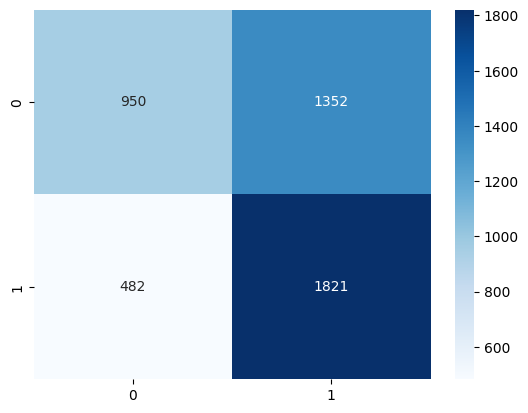

In [ ]:
cf(gnb)

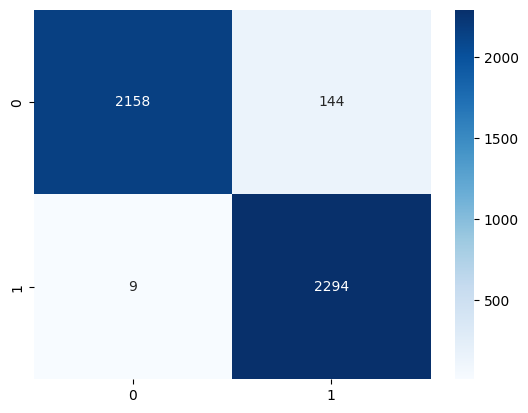

In [ ]:
cf(tree)

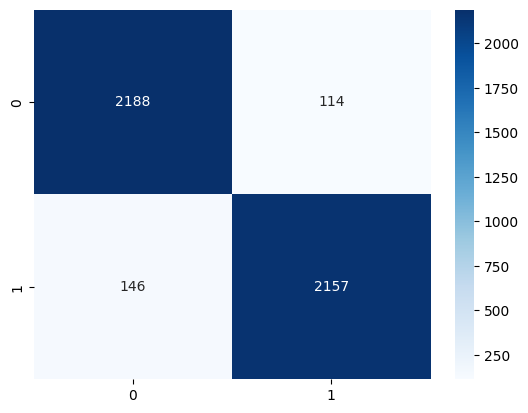

In [ ]:
cf(knn)

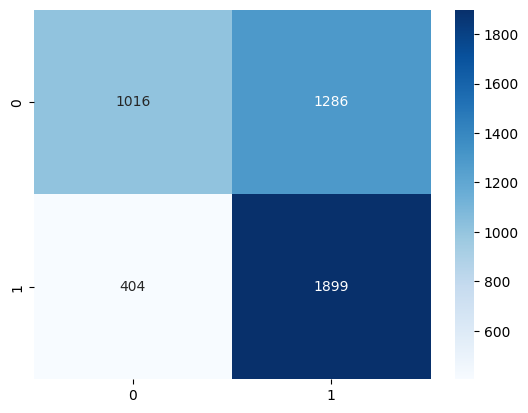

In [ ]:
cf(svm)

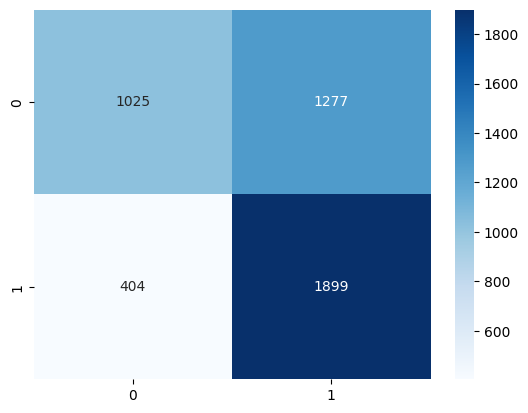

In [ ]:
cf(log)

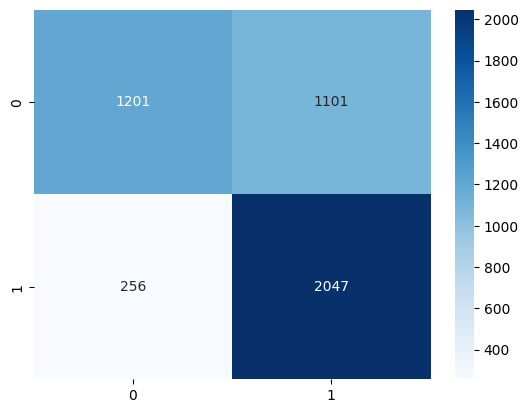

In [ ]:
cf(rf)

In [ ]:
data_list=[]
for model in models:
  y_pred = model.predict(X_test)
  cf_try = confusion_matrix(y_test,y_pred)
  tp = cf_try[0][0]
  fn = cf_try[1][0]
  tn = cf_try[1][1]
  fp = cf_try[0][1]
  tpr = tp / (tp + fn)
  tnr = tn / (tn + fp)
  accuracy = (np.sum(tp) +np.sum(tn)) / np.sum(cf_try)
  data = [tp,fp,fn,tn,tpr,tnr,accuracy]
  data_list.append(data)

In [ ]:
df = pd.DataFrame(data_list,columns=["True Positive","False Positive","False Negative","True Negative","True Positive Rate","True Negative  Rate","Accuracy"],
                  index=["Gausian Naive Bayes","Decision Tree","K-NN","Linear SVM","Logisitic Regression","Random Forest Classifier"])
df

,True Positive,False Positive,False Negative,True Negative,True Positive Rate,True Negative Rate,Accuracy
Gausian Naive Bayes,950,1352,482,1821,0.663408,0.573905,0.601737
Decision Tree,2158,144,9,2294,0.995847,0.940935,0.966775
K-NN,2188,114,146,2157,0.937446,0.949802,0.943540
Linear SVM,1025,1277,404,1899,0.717285,0.597922,0.634962
Logisitic Regression,1201,1101,256,2047,0.824296,0.650254,0.705320
Random Forest Classifier,1016,1286,404,1899,0.715493,0.596232,0.633008


In [ ]:
for model in models:
    scores = cross_val_score(model, X_test, y_test, scoring='accuracy', cv=cv) 
    print('Min Accuracy of {}: %.3f'.format(str(model)) % (scores.min()))
    print('Max Accuracy of {}: %.3f'.format(str(model)) % (scores.max()))
    print('Mean Accuracy of {}: %.3f'.format(str(model)) % (np.mean(scores)))

Min Accuracy of GaussianNB(): 0.561
Max Accuracy of GaussianNB(): 0.636
Mean Accuracy of GaussianNB(): 0.604
Min Accuracy of DecisionTreeClassifier(random_state=39): 0.954
Max Accuracy of DecisionTreeClassifier(random_state=39): 0.974
Mean Accuracy of DecisionTreeClassifier(random_state=39): 0.966
Min Accuracy of KNeighborsClassifier(n_neighbors=3): 0.935
Max Accuracy of KNeighborsClassifier(n_neighbors=3): 0.970
Mean Accuracy of KNeighborsClassifier(n_neighbors=3): 0.952
Min Accuracy of LogisticRegression(max_iter=10000, random_state=39): 0.615
Max Accuracy of LogisticRegression(max_iter=10000, random_state=39): 0.685
Mean Accuracy of LogisticRegression(max_iter=10000, random_state=39): 0.645
Min Accuracy of RandomForestClassifier(max_depth=2, random_state=39): 0.628
Max Accuracy of RandomForestClassifier(max_depth=2, random_state=39): 0.748
Mean Accuracy of RandomForestClassifier(max_depth=2, random_state=39): 0.689
Min Accuracy of LinearSVC(dual=False, random_state=39): 0.609
Max Ac

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(12, input_shape=(9,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X, y, epochs=150, batch_size=100)

Epoch 1/150
154/154 [==============================] - 3s 3ms/step - loss: 9.4445 - accuracy: 0.4885
Epoch 2/150
154/154 [==============================] - 0s 3ms/step - loss: 0.6836 - accuracy: 0.6169
Epoch 3/150
154/154 [==============================] - 0s 3ms/step - loss: 0.6482 - accuracy: 0.6387
Epoch 4/150
154/154 [==============================] - 0s 2ms/step - loss: 0.6416 - accuracy: 0.6424
Epoch 5/150
154/154 [==============================] - 0s 2ms/step - loss: 0.6365 - accuracy: 0.6427
Epoch 6/150
154/154 [==============================] - 0s 2ms/step - loss: 0.6321 - accuracy: 0.6445
Epoch 7/150
154/154 [==============================] - 0s 2ms/step - loss: 0.6281 - accuracy: 0.6488
Epoch 8/150
154/154 [==============================] - 0s 2ms/step - loss: 0.6232 - accuracy: 0.6523
Epoch 9/150
154/154 [==============================] - 0s 2ms/step - loss: 0.6183 - accuracy: 0.6575
Epoch 10/150
154/154 [==============================] - 0s 2ms/step - loss: 0.6141 - accura

In [ ]:
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

480/480 [==============================] - 2s 3ms/step - loss: 0.3451 - accuracy: 0.8312
Accuracy: 83.12


In [ ]:
ypred = model.predict(X_test)

144/144 [==============================] - 1s 3ms/step


<Axes: >

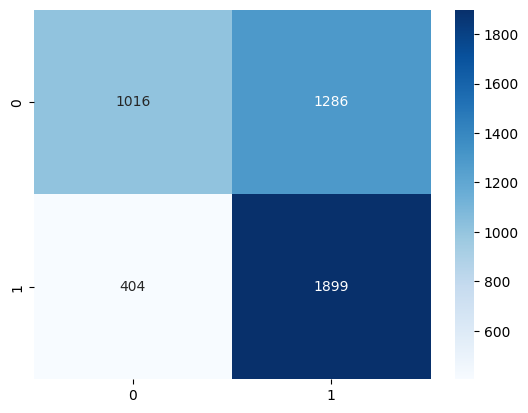

In [ ]:
cf = confusion_matrix(y_test,y_pred)   
counts = ['{0:0.0f}'.format(i) for i in cf.flatten()]
counts = np.asarray(counts).reshape(2,2)
ax = plt.axes()
sns.heatmap(cf, annot=counts, fmt='', cmap='Blues')